In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time

### Load train dataset

In [2]:
data = pd.read_csv("../data/train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into training and dev sets

In [5]:
data

array([[9, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       ...,
       [9, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0]], shape=(42000, 785))

#### Dev set

In [6]:
data_dev = data[0:1000].T # T for transposing as each column is number features
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. # scaling X between 0 and 1

In [7]:
print(X_dev.shape)
X_dev[:10]

(784, 1000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10, 1000))

In [8]:
print(Y_dev.shape)
Y_dev[:10]

(1000,)


array([9, 2, 8, 0, 4, 0, 3, 6, 8, 0])

#### Training set

In [9]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [10]:
print(X_train.shape)
X_train[:10]

(784, 41000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10, 41000))

In [11]:
print(Y_train.shape)
Y_train[:10]

(41000,)


array([2, 2, 6, 7, 7, 8, 8, 8, 3, 8])

### Define our Neural Network

Our NN will have a simple two-layer architecture. Input layer a<sup>[0]</sup> will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer  𝑎<sup>[1]</sup>
  will have 10 units with ReLU activation, and finally our output layer  𝑎<sup>[2]</sup>
  will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$Z^{[1]} = W^{[1]}X + b^{[1]}$

$A^{[1]} = g_{ReLU}(Z^{[1]})$

$Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$

$A^{[2]} = g_{softmax}(Z^{[2]})$

**Backward propagation**

$dZ^{[2]} = A^{[2]} - Y$

$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$

$dB^{[2]} = \frac{1}{m} \Sigma dZ^{[2]}$

$dZ^{[1]} = W^{[2]T} dZ^{[2]} \cdot* g^{[1]'}(z^{[1]})$

$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$

$dB^{[1]} = \frac{1}{m} \Sigma dZ^{[1]}$

**Parameter updates**

$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$

$b^{[2]} := b^{[2]} - \alpha db^{[2]}$

$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$

$b^{[1]} := b^{[1]} - \alpha db^{[1]}$

### Vars and shapes

**Forward prop**

- $A^{[0]} = X$: 784 x m

- $Z^{[1]} \sim A^{[1]}$: 10 x m

- $W^{[1]}$: 10 x 784 (as $W^{[1]}A^{[0]} \sim Z^{[1]}$)

- $B^{[1]}$: 10 x 1

- $Z^{[2]} \sim A^{[2]}$: 10 x m

- $W^{[2]}$: 10 x 10 (as $W^{[2]}A^{[1]} \sim Z^{[2]}$)

- $B^{[2]}$: 10 x 1

**Backprop**

- $dZ^{[2]}$: 10 x m ($A^{[2]}$)

- $dW^{[2]}$: 10 x 10

- $dB^{[2]}$: 10 x 1

- $dZ^{[1]}$: 10 x m ($A^{[1]}$)

- $dW^{[1]}$: 10 x 784

- $dB^{[1]}$: 10 x 1

#### Forward Prop

In [12]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [13]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [14]:
def softmax(Z):
    """Column-wise stable softmax. Z shape: (n_classes, m)"""
    Z_shift = Z - np.max(Z, axis=0, keepdims=True)
    expZ = np.exp(Z_shift)
    return expZ / np.sum(expZ, axis=0, keepdims=True)

In [15]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#### Backward Prop

In [16]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1 ))
    one_hot_Y[np.arange(Y.size), Y] = 1  # places a 1 in the correct column (representing the class label) for each row (representing a data point).
    one_hot_Y = one_hot_Y.T  # now each row of one_hot_Y corresponds to a class, and each column corresponds to a data point
    return one_hot_Y

In [17]:
def ReLU_deriv(Z):
    return Z > 0  # This will output 1 if Z bigger that zero (relu in positive side of x axis) and 0 if not (remember relu function shape for better intuition)

In [18]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2 * ReLU_deriv(Z1))
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [19]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # our tiny steps down the hill
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [20]:
def get_predictions(A2):
    # return max value afte our softmax
    return np.argmax(A2, 0)

In [21]:
def get_accuracy(predictions, Y):
    # For printing accuracy of model through iterations
    print(predictions, Y) #pring model output Ys and Y_hat (real Ys)
    return np.sum(predictions == Y) / Y.size

In [22]:
def cross_entropy_loss_from_A2(A2, Y):
    """A2: (10, m), Y: (m,) -> scalar average cross-entropy"""
    Y_one = one_hot(Y)           # shape (10, m)
    eps = 1e-12
    m = Y.size
    loss = - np.sum(Y_one * np.log(A2 + eps)) / m
    return loss

### Gradient descent with plotting at the end

In [23]:
def gradient_descent(X_train, Y_train, X_dev, Y_dev,
                   epochs=30,
                   iterations_per_epoch=20,
                   alpha=0.1,
                   verbose=True):
    """
    Train using forward/backward/update functions in epoch steps,
    compute train/dev loss each epoch and plot them.
    - iterations_per_epoch * epochs is equivalent to total iterations.
    - This function does NOT modify my existing functions; it only adds a wrapper.
    """
    # initialize parameters
    W1, b1, W2, b2 = init_params()

    train_losses = []
    dev_losses = []

    start_time = time.time()
    for ep in range(epochs):
        ep_start = time.time()
        # iterations_per_epoch gradient steps
        for it in range(iterations_per_epoch):
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
            dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_train, Y_train)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        # compute losses using stable softmax built from the raw Z2 returned by forward_prop
        _, _, Z2_train_raw, _ = forward_prop(W1, b1, W2, b2, X_train)
        A2_train = softmax(Z2_train_raw)
        loss_train = cross_entropy_loss_from_A2(A2_train, Y_train)

        _, _, Z2_dev_raw, _ = forward_prop(W1, b1, W2, b2, X_dev)
        A2_dev = softmax(Z2_dev_raw)
        loss_dev = cross_entropy_loss_from_A2(A2_dev, Y_dev)

        train_losses.append(loss_train)
        dev_losses.append(loss_dev)

        if verbose:
            # show training accuracy on train set
            train_preds = get_predictions(A2_train)
            train_acc = get_accuracy(train_preds, Y_train)
            ep_time = time.time() - ep_start
            print(f"Epoch {ep+1}/{epochs}  train_loss={loss_train:.4f}  dev_loss={loss_dev:.4f}  train_acc={train_acc:.4f}  ({ep_time:.1f}s)")

    total_time = time.time() - start_time
    if verbose:
        print(f"\nTraining finished in {total_time:.1f}s")

    # plot losses
    plt.figure(figsize=(8,5))
    plt.plot(train_losses, label='train loss')
    plt.plot(dev_losses, label='dev loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Train vs Dev loss per epoch')
    plt.legend()
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

    return W1, b1, W2, b2, train_losses, dev_losses

#### Let's Train

[1 6 4 ... 4 9 4] [2 2 6 ... 9 7 4]
Epoch 1/50  train_loss=2.0746  dev_loss=2.0775  train_acc=0.2536  (0.5s)
[2 1 4 ... 4 7 4] [2 2 6 ... 9 7 4]
Epoch 2/50  train_loss=1.8127  dev_loss=1.8248  train_acc=0.3692  (0.4s)
[2 1 4 ... 4 7 4] [2 2 6 ... 9 7 4]
Epoch 3/50  train_loss=1.6156  dev_loss=1.6318  train_acc=0.4525  (0.4s)
[2 2 4 ... 4 7 4] [2 2 6 ... 9 7 4]
Epoch 4/50  train_loss=1.4565  dev_loss=1.4777  train_acc=0.5112  (0.4s)
[2 2 4 ... 4 7 4] [2 2 6 ... 9 7 4]
Epoch 5/50  train_loss=1.3289  dev_loss=1.3535  train_acc=0.5597  (0.4s)
[2 2 4 ... 9 7 4] [2 2 6 ... 9 7 4]
Epoch 6/50  train_loss=1.2282  dev_loss=1.2549  train_acc=0.5975  (0.4s)
[2 2 4 ... 9 7 4] [2 2 6 ... 9 7 4]
Epoch 7/50  train_loss=1.1500  dev_loss=1.1779  train_acc=0.6227  (0.4s)
[2 2 4 ... 9 7 4] [2 2 6 ... 9 7 4]
Epoch 8/50  train_loss=1.0895  dev_loss=1.1186  train_acc=0.6433  (0.4s)
[2 2 4 ... 9 7 4] [2 2 6 ... 9 7 4]
Epoch 9/50  train_loss=1.0418  dev_loss=1.0724  train_acc=0.6589  (0.4s)
[2 2 4 ... 9 7 4] [

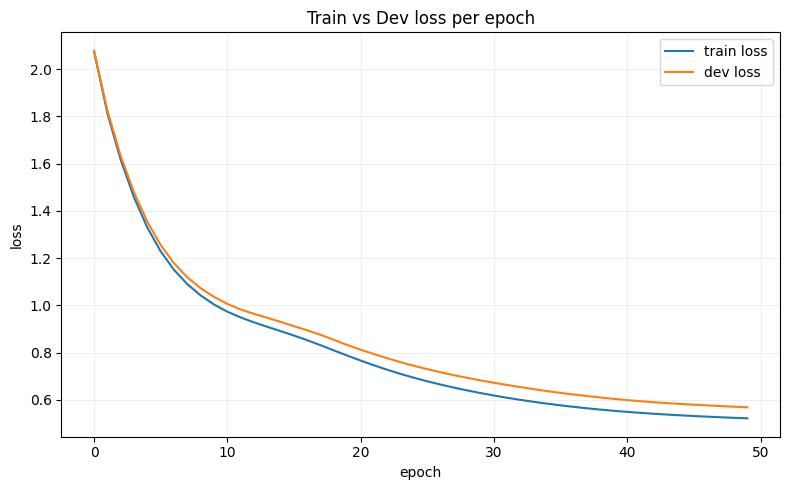

In [26]:
W1, b1, W2, b2, train_losses, dev_losses = gradient_descent(
    X_train, Y_train, X_dev, Y_dev,
    epochs=50, iterations_per_epoch=20, alpha=0.10)

*with 1000 iterations the model accuracy is about 80 percent * \
ps: my neural network architecture could be more complex with more layers and neurons (right now my model is high bias compare to state of the art handwritten digit recognition neural networks) \
or even using CNN, vision-transformers and etc but I wanted to build a neural network from scratch with raw algebra and math for educational purposes and gain better intuition about neural networks

### Test the model on dev set

In [27]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [28]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 9 2 0 4 5 3 6 3 0 7 6 8 3 7 5 9 1 2 8 5 5 8 9 9 3 8 7 8 3 5 0 9 2 1 3 1
 5 2 1 0 6 7 9 9 1 5 7 9 5 9 7 5 7 9 2 3 7 8 1 6 4 3 3 5 7 8 8 5 8 2 0 0 8
 9 4 6 4 5 3 7 3 3 3 6 7 7 5 6 3 9 1 1 9 4 2 9 1 4 0 2 6 3 4 1 0 4 4 7 7 9
 4 6 5 0 9 4 6 6 4 2 1 0 0 8 7 7 6 4 1 6 6 0 4 2 1 3 5 9 3 5 4 5 0 0 4 3 0
 2 7 2 4 1 6 3 1 2 1 8 4 1 4 2 8 5 7 6 0 6 9 3 6 1 3 1 1 6 2 6 8 1 2 9 8 5
 9 9 0 5 2 3 8 9 6 6 0 2 8 0 9 9 0 7 8 6 2 1 2 7 4 5 0 0 6 0 8 3 6 9 7 0 3
 6 6 1 2 9 8 8 4 3 7 7 4 5 0 5 4 8 7 9 3 2 3 1 8 1 1 2 1 2 9 0 4 1 3 3 8 0
 1 4 5 0 3 3 5 1 5 6 2 3 1 7 0 3 2 6 7 6 1 1 4 0 1 4 5 2 8 2 8 3 7 2 0 6 3
 2 2 4 4 4 6 5 7 9 9 8 9 5 5 2 0 7 9 1 9 3 7 8 1 0 6 8 7 1 5 0 3 6 0 6 0 0
 6 1 9 2 9 3 3 5 3 4 9 3 1 8 4 5 7 7 3 8 9 4 6 8 4 3 5 6 0 4 0 8 8 9 5 9 6
 3 4 7 8 5 8 2 0 2 6 5 2 5 4 1 7 1 3 9 7 3 3 0 9 7 0 7 4 1 9 7 6 2 9 0 0 2
 1 6 5 7 7 6 8 1 9 9 2 7 4 5 7 5 6 8 8 7 4 2 4 9 7 2 8 6 3 3 8 9 3 2 0 1 9
 3 4 4 4 1 9 3 3 2 4 5 9 4 8 3 1 2 1 1 7 2 4 1 0 7 3 3 7 6 5 1 9 8 5 6 0 3
 2 0 1 3 7 0 6 2 9 8 7 3 

np.float64(0.829)

*got about 80 percent on dev set* \
This number (+- 2 percent) show a well balanced model in Bias-Variance trade-off

### Look at some example

In [29]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("label: ", label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show

Prediction:  [2]
label:  2


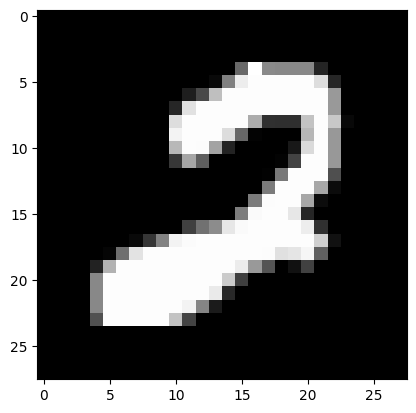

In [64]:
test_prediction(1, W1, b1, W2, b2)